### Videogame Sales

An analysis of video game sales as of December 22, 2016. Our dataset contains a list of video games with sales greater than 100,000 copies, including columns: Rank, Name, Platform, Year, Genre, Publisher, NA Sales, EU Sales, JP Sales, Other Sales, and Global Sales.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv("vgsales.csv")

In [3]:
sales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
sales_df.shape

(16598, 11)

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
sales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Checking null values

In [7]:
sales_df.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [8]:
sales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Checking Duplicates

In [9]:
sales_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

In [10]:
sales_df.duplicated().value_counts()

False    16598
Name: count, dtype: int64

####  Which company is the most common video game publisher?



### idxmax() method

#### The idxmax() method returns a Series with the index of the maximum value for each column.

#### By specifying the column axis (axis='columns'), the idxmax() method returns a Series with the index of the maximum value for each row.

In [11]:
sales_df["Publisher"].value_counts().idxmax()

'Electronic Arts'

In [12]:
sales_df["Publisher"].value_counts()


Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

#### What’s the most common platform?



In [13]:
sales_df["Platform"].value_counts().idxmax()

'DS'

In [14]:
sales_df["Platform"].value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

#### What about the most common genre?



In [15]:
sales_df["Genre"].value_counts().idxmax()

'Action'

In [16]:
sales_df["Genre"].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

### nlargest() method

#### Return the first n rows ordered by columns in descending order. Return the first n rows with the largest values in columns , in descending order.

or

#### The nlargest() method returns a specified number of rows, starting at the top after sorting the DataFrame by the highest value for a specified column.

In [17]:
sales_df["Name"].value_counts()

Name
Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: count, Length: 11493, dtype: int64

In [18]:
sales_df["Name"].value_counts().nlargest(5)

Name
Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
Name: count, dtype: int64

In [19]:
sales_df["Genre"].value_counts().nlargest(5)

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: count, dtype: int64

In [20]:
sales_df["Name"].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

In [21]:
sales_df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [22]:
sales_df["Publisher"].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


#### What are the top 20 highest grossing games?



In [23]:
sales_df[["Name","Global_Sales"]].sort_values(["Global_Sales"], ascending = False).head(20)

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


#### Finding Sum and average(mean) of the sales

In [24]:
glob_sum = sales_df["Global_Sales"].sum()
glob_sum

8920.44

In [36]:
NA_sum = sales_df["NA_Sales"].sum()
NA_sum

4392.950000000001

In [37]:
EU_sum =sales_df["EU_Sales"].sum()
EU_sum

2434.1299999999997

In [39]:
JP_sum = sales_df["JP_Sales"].sum()
JP_sum

1291.0200000000002

In [51]:
Other_sum = sales_df["Other_Sales"].sum()
Other_sum

797.7500000000001

### Average of Sales

In [28]:
sales_df["Global_Sales"].mean()

0.5374406555006628

In [29]:
sales_df["NA_Sales"].mean()

0.26466742981082064

In [30]:
sales_df["EU_Sales"].mean()

0.14665200626581515

In [31]:
sales_df["JP_Sales"].mean()

0.077781660441017

In [32]:
sales_df["Other_Sales"].mean()

0.0480630196409206

#### what is the game have Highest selling in Global Sales?



In [33]:
sales_df[sales_df.Global_Sales == sales_df.Global_Sales.max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [40]:
sales_df[sales_df.NA_Sales == sales_df.NA_Sales.max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


#### Which region had the highest sales 

In [48]:
region = sales_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.49,29.02,3.77,8.46
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00
...,...,...,...,...
16593,0.01,0.00,0.00,0.00
16594,0.01,0.00,0.00,0.00
16595,0.00,0.00,0.00,0.00
16596,0.00,0.01,0.00,0.00


<Axes: >

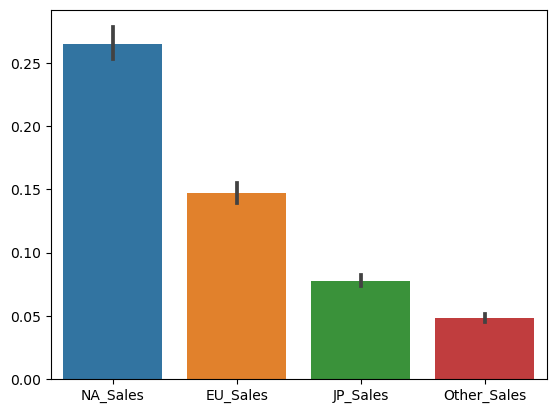

In [49]:
sns.barplot(region)

In [53]:
if NA_sum < EU_sum > JP_sum :
    print("EU_Sales greater than NA_Sales and JP_Sales")
elif NA_sum < JP_sum > EU_sum:
    print("JP_Sales greater than NA_Sales and EU_Sales")
elif EU_sum < NA_sum > JP_sum:
    print("NA_Sales greater than EU_Sales and JP_Sales")
else:
    print("unexpected error")

NA_Sales greater than EU_Sales and JP_Sales


#### which year had the highest sales of games

In [43]:
sales_df["Year"].value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

#### who are  the Top 10 Publisher by Global Sales

In [59]:
top_publisher = sales_df.groupby('Publisher')["Global_Sales"].sum().nlargest(10)
top_publisher

Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64

Text(0, 0.5, 'Global_Sales')

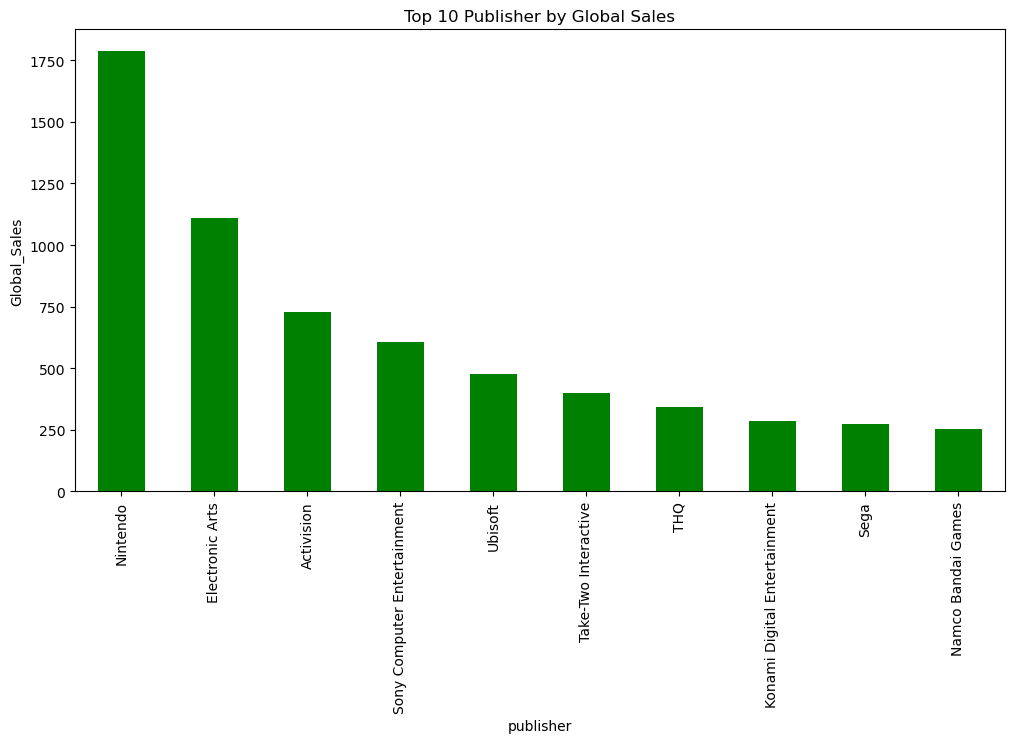

In [60]:
plt.figure(figsize=(12,6))  # (width, height)
top_publisher.plot(kind ="bar", color = "green")
plt.title("Top 10 Publisher by Global Sales")
plt.xlabel("publisher")
plt.ylabel("Global_Sales")


In [61]:
sales_df.to_excel("vgsales.xlsx", index = False)